In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import random
import pickle
import os

In [3]:
print(os.getcwd())

/home/dyab/Documents/AI/NN-from-scratch-repo/NN-from-scratch/Tensorflow/cats_dogs_real_images


In [6]:
data_dir = os.getcwd() + '/kagglecatsanddogs_5340/PetImages'
categories = ['Dog', 'Cat']

In [7]:
path = os.path.join(data_dir, categories[0])
path

'/home/dyab/Documents/AI/NN-from-scratch-repo/NN-from-scratch/Tensorflow/cats_dogs_real_images/kagglecatsanddogs_5340/PetImages/Dog'

In [8]:
len(os.listdir(path))

12501

In [9]:
path = os.path.join(data_dir, categories[1])
len(os.listdir(path))

12501

(375, 500)


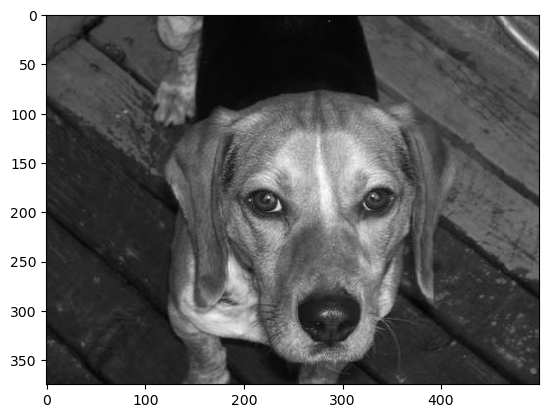

In [10]:
for categeory in categories:
    path = os.path.join(data_dir, categeory)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img), 0)
        plt.imshow(img, cmap='gray')
        print(img.shape)
        break
    break

(100, 100)


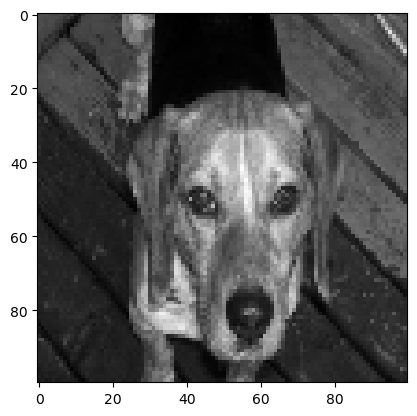

In [11]:
image_size = 100

new_img = cv2.resize(img, (image_size, image_size))
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

In [12]:
def create_training_data(data_dir, categories, image_size = 100):

    training_data = []
    for categeory in categories:    
        path = os.path.join(data_dir, categeory)
        class_num = categories.index(categeory)

        
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path,img), 0)
                new_img = cv2.resize(img, (image_size, image_size))
                training_data.append([new_img, class_num])
            except:
                pass

    
    return training_data

In [14]:
data_dir = os.getcwd() + '/kagglecatsanddogs_5340/PetImages'
categories = ['Dog', 'Cat']
training_data = create_training_data(data_dir, categories)

Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


In [15]:
len(training_data)

24946

In [16]:
training_data[0]

[array([[77, 78, 78, ..., 73, 81, 78],
        [77, 76, 75, ..., 98, 85, 83],
        [79, 76, 72, ..., 94, 99, 76],
        ...,
        [34, 35, 36, ..., 43, 53, 39],
        [37, 31, 40, ..., 44, 43, 44],
        [30, 37, 28, ..., 34, 43, 37]], dtype=uint8),
 0]

In [17]:
training_data[0][0]

array([[77, 78, 78, ..., 73, 81, 78],
       [77, 76, 75, ..., 98, 85, 83],
       [79, 76, 72, ..., 94, 99, 76],
       ...,
       [34, 35, 36, ..., 43, 53, 39],
       [37, 31, 40, ..., 44, 43, 44],
       [30, 37, 28, ..., 34, 43, 37]], dtype=uint8)

In [18]:
training_data[0][1]

0

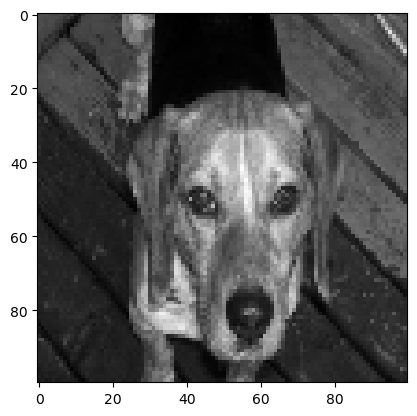

In [19]:
plt.imshow(training_data[0][0], cmap='gray')

In [20]:
random.shuffle(training_data)

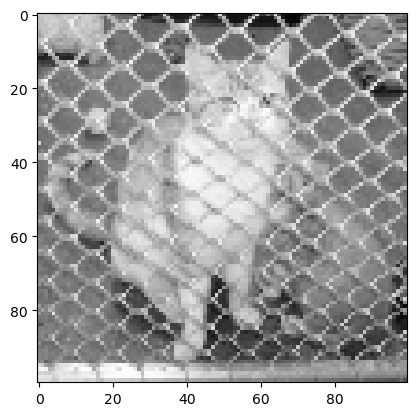

In [21]:
plt.imshow(training_data[0][0], cmap='gray')

In [22]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [23]:
X.shape

(24946, 100, 100)

In [24]:
X[0].shape

(100, 100)

In [25]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [26]:
#save modified data
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [27]:
#read modified data
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [28]:
X.shape

(24946, 100, 100)